In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dilvinn","key":"0989c8620baa7cd974d8ec9106477f90"}'}

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [3]:
!kaggle datasets download -d datamunge/sign-language-mnist

Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0


In [78]:
import zipfile

with zipfile.ZipFile("sign-language-mnist.zip", "r") as zip_ref:
    zip_ref.extractall("sign_mnist")

In [79]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn


In [80]:
train_df = pd.read_csv("sign_mnist/sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist/sign_mnist_test.csv")

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [81]:
def resim_goster(x,y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])

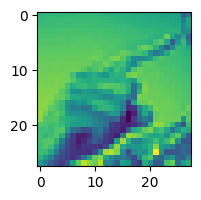

In [82]:
resim_goster(X_train, y_train, 1)

In [83]:
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

#normalizasyon
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# etiketleri one-hot encode ediyoruz
y_train = to_categorical(y_train, num_classes=25)
y_test = to_categorical(y_test, num_classes=25)

# ANN MODELİ

In [84]:
ann = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(25, activation='softmax')  # 25 sınıf olduğu için
])

ann.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
ann.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 25)                  │           3,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 226,969 (886.60 KB)

 Trainable params: 226,969 (886.60 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
ann_analiz = ann.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4916 - loss: 1.7372 - val_accuracy: 0.8714 - val_loss: 0.3643
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9840 - loss: 0.0758 - val_accuracy: 0.8968 - val_loss: 0.3405
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9996 - loss: 0.0087 - val_accuracy: 0.8850 - val_loss: 0.3744
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9963 - loss: 0.0160 - val_accuracy: 0.9152 - val_loss: 0.3137
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9996 - loss: 0.0024 - val_accuracy: 0.9274 - val_loss: 0.2906
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 3.7970e-04 - val_accuracy: 0.9278 - val_loss: 0.3007
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 1.0000 - loss: 2.4989e-04 - val_accuracy: 0.9208 - val_loss: 0.3129
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9950 - loss: 0.0197 - val_accu

In [86]:
y_tahmin1 = ann.predict(X_test)
y_tahmin1_sinif = [np.argmax(i) for i in y_tahmin1]

# y_test'i çok sınıflı formata dönüştürür
y_test_sinif = np.argmax(y_test, axis=1)

print("Sınıflandırma Raporu \n", classification_report(y_test_sinif, y_tahmin1_sinif))

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Sınıflandırma Raporu 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       0.89      0.92      0.91       245
           4       0.97      0.96      0.97       498
           5       0.87      1.00      0.93       247
           6       0.94      0.90      0.92       348
           7       0.91      0.95      0.93       436
           8       0.93      0.86      0.89       288
          10       1.00      0.87      0.93       331
          11       0.91      1.00      0.95       209
          12       0.93      0.92      0.92       394
          13       0.96      0.75      0.84       291
          14       1.00      0.91      0.95       246
          15       0.96      1.00      0.98       347
          16       0.89      1.00      0.94       164
          17     

In [87]:
ann.evaluate(X_test, y_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9163 - loss: 0.3509


[0.33902251720428467, 0.9202454090118408]

In [88]:

y_pred = ann.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)  # y_test'i tek boyutlu hale getir

# Yanlış tahmin edilen indeksler
incorrect = np.where(y_pred_classes != y_true)[0]
print(f"Toplam yanlış tahmin sayısı: {len(incorrect)}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Toplam yanlış tahmin sayısı: 572


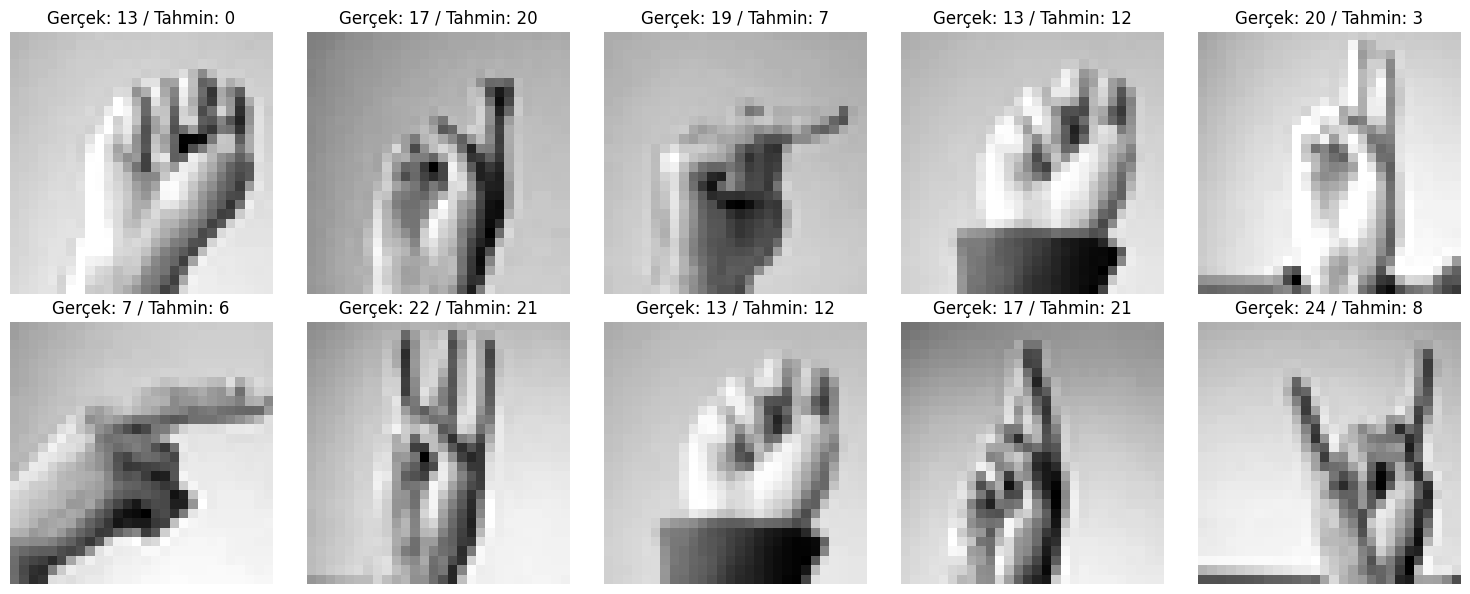

In [89]:
# ann İlk 10 hatalı tahmini gösterir
plt.figure(figsize=(15, 6))
for i, idx in enumerate(incorrect[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Gerçek: {y_true[idx]} / Tahmin: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

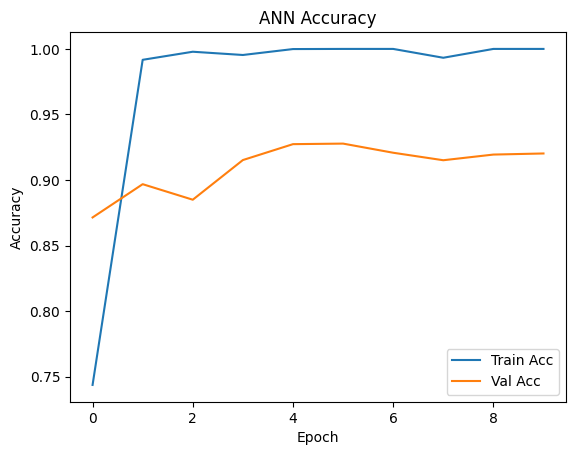

In [90]:

plt.plot(ann_analiz.history['accuracy'], label='Train Acc')
plt.plot(ann_analiz.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ANN Accuracy")
plt.show()

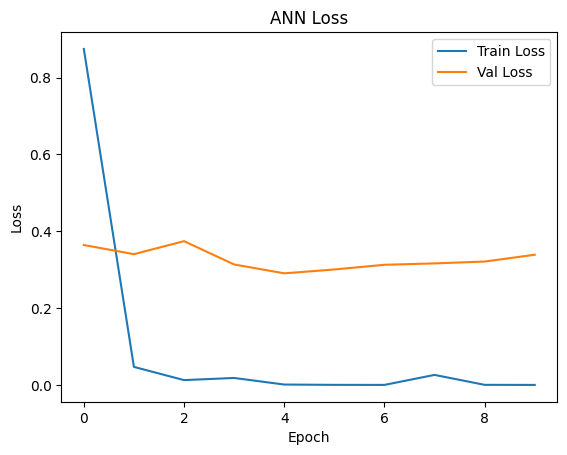

In [91]:
plt.plot(ann_analiz.history['loss'], label='Train Loss')
plt.plot(ann_analiz.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("ANN Loss")
plt.show()

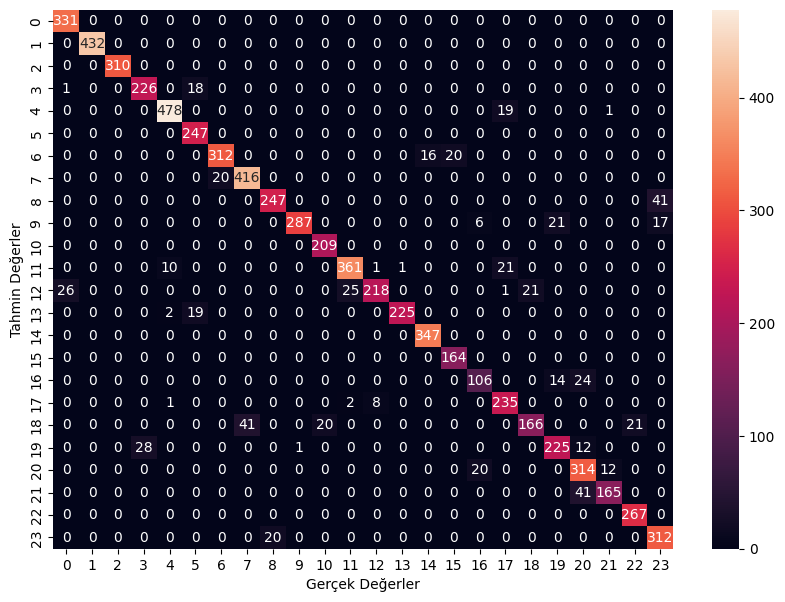

In [92]:
y_test_sinif = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_sinif, y_tahmin1_sinif)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerler")
plt.show()

# CNN MODELİ

In [93]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)), # input_shape güncellendi
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(25, activation="softmax")
])

cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 25)                  │           1,625 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,553 (400.60 KB)

 Trainable params: 102,553 (400.60 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

In [95]:
cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"]
            )
cnn.fit(X_train, y_train, epochs=10, batch_size=32) #batch_size yazılamzsa varsayılan 32 dir

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3090 - loss: 2.2910
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8801 - loss: 0.3688
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9763 - loss: 0.0901
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9940 - loss: 0.0304
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9889 - loss: 0.0383
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9945 - loss: 0.0205
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9992 - loss: 0.0042
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9993 - loss: 0.0055
Epoch 9/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9897 - loss: 0.0421
Epoch 10/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 1.0000 - loss: 4.9654e-04


In [96]:
y_tahmin2=cnn.predict(X_test)
y_tahmin2_sinif=[np.argmax(i) for i in y_tahmin2]
print("Sınıflandırma Raporu \n", classification_report(y_test, y_tahmin2_sinif) )

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Sınıflandırma Raporu 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       331
           1       1.00      0.92      0.96       432
           2       0.88      0.97      0.92       310
           3       0.88      0.96      0.92       245
           4       0.90      0.96      0.93       498
           5       1.00      1.00      1.00       247
           6       0.87      0.77      0.82       348
           7       0.82      0.94      0.88       436
           8       0.87      0.93      0.90       288
          10       0.81      0.88      0.84       331
          11       0.91      0.89      0.90       209
          12       0.91      0.92      0.92       394
          13       1.00      0.89      0.94       291
          14       0.96      0.83      0.89       246
          15       0.99      0.93      0.96       347
          16       0.95      0.87      0.91       164
          17     

In [97]:
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test

incorrect = np.where(y_pred_classes != y_true)[0]
print(f"Toplam yanlış tahmin sayısı: {len(incorrect)}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Toplam yanlış tahmin sayısı: 778


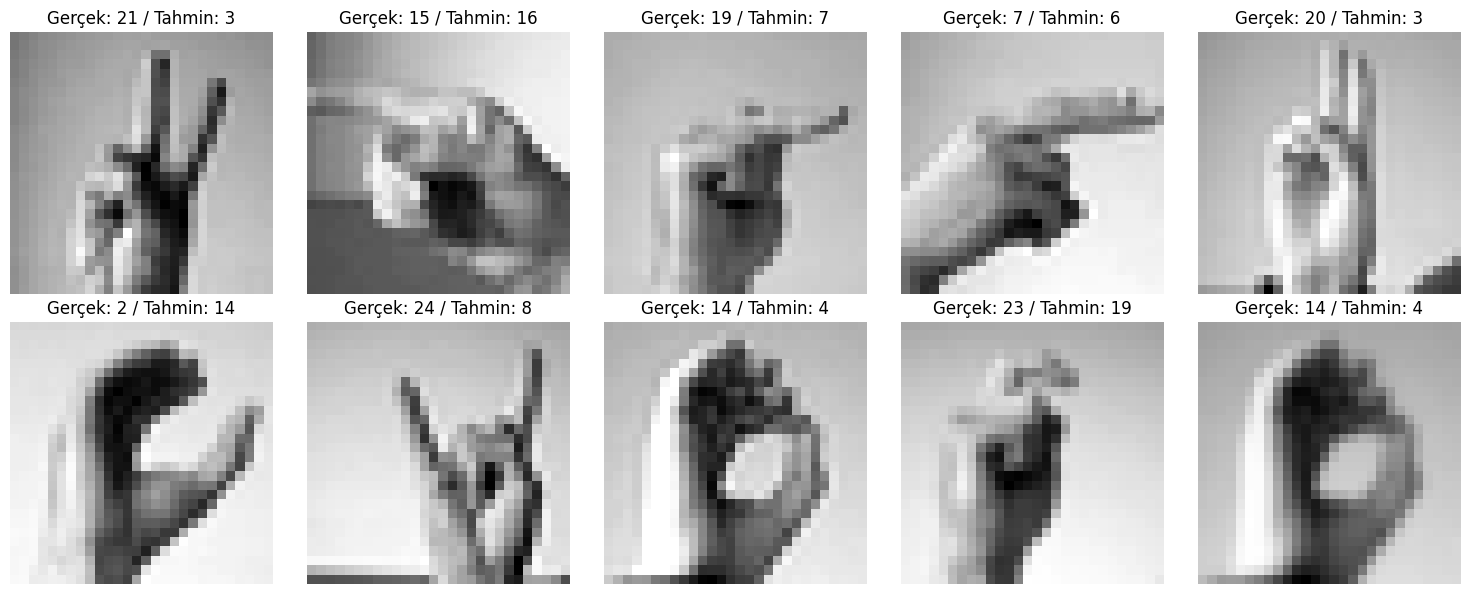

In [98]:
# cnn İlk 10 hatalı tahmini gösterir
plt.figure(figsize=(15, 6))
for i, idx in enumerate(incorrect[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Gerçek: {y_true[idx]} / Tahmin: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [99]:
cnn_analiz = cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 1.0000 - loss: 2.5073e-04 - val_accuracy: 0.8938 - val_loss: 0.5327
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 1.3576e-04 - val_accuracy: 0.8914 - val_loss: 0.5749
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 1.0000 - loss: 8.9822e-05 - val_accuracy: 0.8932 - val_loss: 0.5703
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 6.0774e-05 - val_accuracy: 0.8938 - val_loss: 0.6061
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9741 - loss: 0.1026 - val_accuracy: 0.8864 - val_loss: 0.4819
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 1.0000 - loss: 5.0008e-04 - val_accuracy: 0.8933 - val_loss: 0.5305
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 1.9177e-04 - val_accuracy: 0.8985 - val_loss: 0.5303
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 1

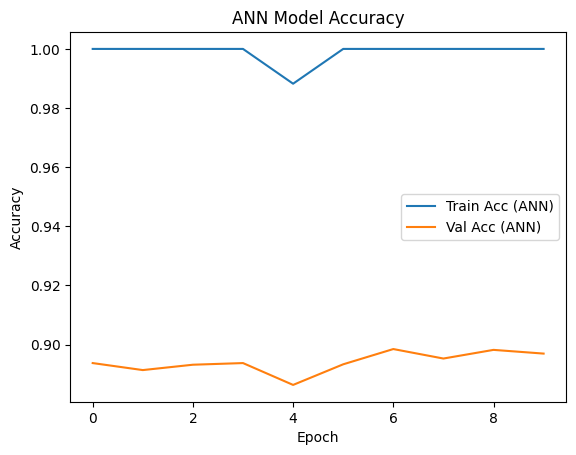

In [100]:
plt.plot(cnn_analiz.history['accuracy'], label='Train Acc (ANN)')
plt.plot(cnn_analiz.history['val_accuracy'], label='Val Acc (ANN)')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ANN Model Accuracy")
plt.show()

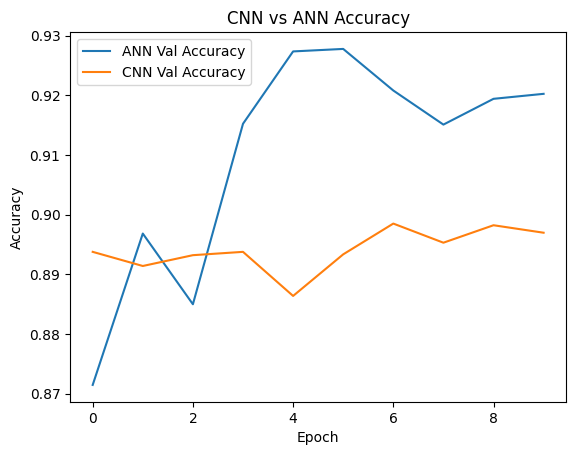

In [101]:
plt.plot(ann_analiz.history['val_accuracy'], label='ANN Val Accuracy')
plt.plot(cnn_analiz.history['val_accuracy'], label='CNN Val Accuracy')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("CNN vs ANN Accuracy")
plt.show()


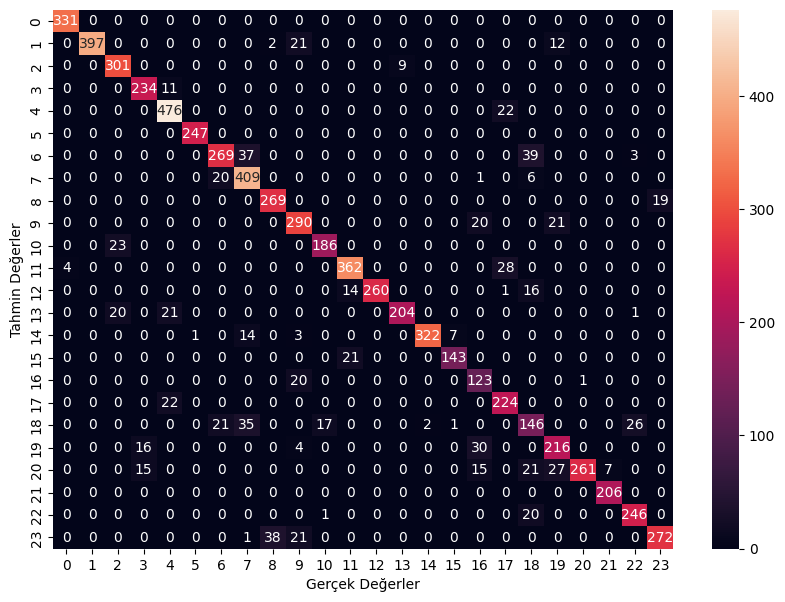

In [102]:
y_test_sinif = y_test

cm = confusion_matrix(y_test_sinif, y_tahmin2_sinif)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerler")
plt.show()